# [Data Science Term Project proposal]

### 1. Team member
201835401 강나현

201835454 박민석

201935121 임혜균

202035400 현도연

### 2. Dataset
'googleplaystore.csv' file of https://www.kaggle.com/datasets/lava18/google-play-store-apps
 explanation ; details of the applications on Google Play(2019)
This information is scraped from the Google Play Store.
The Play Store apps data has enormous potential to drive app-making businesses to success.
Actionable insights can be drawn for developers to work on and capture the Android market.


* columns
 * (1)  : App: Application name
 * (2)  : category: Category the app belongs to -FAMILY, GAME, TOOLS, BUSINESS
 * (3)  : rating: Overall user rating of the app (as when scraped)
 * (4)  : Reviews: Number of user reviews for the app (as when scraped)
 * (5)  : Installs: Number of user downloads/installs for the app (as when scraped)
 * (6)  : Type : Paid / Free
 * (7)  : Price : Price of the app (as when scraped)
 * (8)  : Content rating : Age group the app is targeted at - Everyone /Teen / Mature 17+
 * (9)  : Last Updated ; Date when the app was last updated on Play Store (as when scraped)
 * (10) : Current Ver ; Current version of the app available on Play Store (as when scraped)
 보통 버전 번호는 반드시 X.Y.Z
X는 주(主, Major)버전 번호이고, Y는 부(部, Minor)버전 번호이며, Z는 수(修, Patch)버전 번호이다. 각각은 반드시 증가하는 수여야 한다
 * (11) : Android Ver ; Min required Android version (as when scraped)
 * (12) : Size: Size of the app (as when scraped)
 * (13) : Genre: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to -Tools/ Entertainment / Education/ Business


### 3. Objectives of analysis
**Main objectives**: Find out which categories were popular in the year and recommend apps based on them.

**Sub objectives**: 
1. Find out what properties popular applications have.
2. Find out the correlation between Rating, Review count, and Install count.(Because it is difficult to evaluate apps only with Rating.)
3. Afterwards, popular apps such as "Category", "Age", and "Paid/Free" are recommended based on the measured "Popularity" criteria.


### 4. Dataset discription
1. Statics
  *   df.shape
  *   df.index
  *   df.dtypes
  *   df.describe()
  *   df.columns
  *   df.info()
2. Tables
  *   df.info()
3. Plots: plot 'category', 'Installs', 'Rating', 'Price' and 'Size'.
  *   plt.scatter()
  *   plt.plot(x_value, y)
4. Missing values
  *  If 'numerical', replace with the average value of each column.
  *  'Null' value of Rating is replaced with a value similar to the number of installations.
5. Outliers
  *  If you have 100 or less reviews, report it as Outlier and drop it.


---

## **What we need to deal with in the future**
1. Column with wrong value entered exists as a whole.
2. The data of 'Reviews', 'Size', 'Price' and 'Installs' must be float, not object.
3. Nan value exist in 'Rating'. A value of more than 5 points exists.
4. We decide some datasets that are not needed for our purpose are 'Last Updated', 'Current Ver', 'Android Ver', 'Size' and 'Genre'. -> Will be dropped in preprocessing steps.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://drive.google.com/file/d/19pl0nAmNpIInWbkR8kHx2FxC2zFeW7YA/view?usp=sharing"
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)
df = pd.read_csv(path)

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=19pl0nAmNpIInWbkR8kHx2FxC2zFeW7YA


# Dataset description: Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Dataset description: Tables

In [5]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Dataset description: Plots

Usually, histograms are used a lot when checking distributions. You draw a bar graph by dividing the sections. However, you should be careful because the histogram results vary greatly depending on how you set the interval, which can lead to wrong conclusions and interpretations.

---

Therefore, **Kernel Density Estimator** (KDE) is a common alternative.
 * **sns.kdeplot(data, shade)**
 * data: Datasets you want to visualize.
 * shade: Determining whether to shade the space under the curve; **True, False**
 * clip: range of x
---



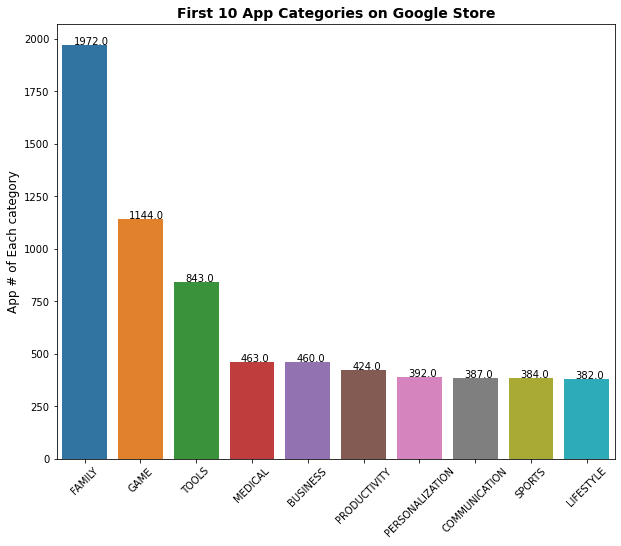

In [6]:
#
first_ten_index=df["Category"].value_counts().head(10).index
first_ten_values=df["Category"].value_counts().head(10).values

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=first_ten_index, y=first_ten_values ).set_title('First 10 App Categories on Google Store',
                                                              fontdict= { 'fontsize': 14,'fontweight':'bold'})
plt.xticks(rotation=45)
ax.set_ylabel('App # of Each category', size =12)
for p in ax.patches: 
    ax.annotate(p.get_height(), (p.get_x()+0.2 , p.get_height()+0.3 ) );

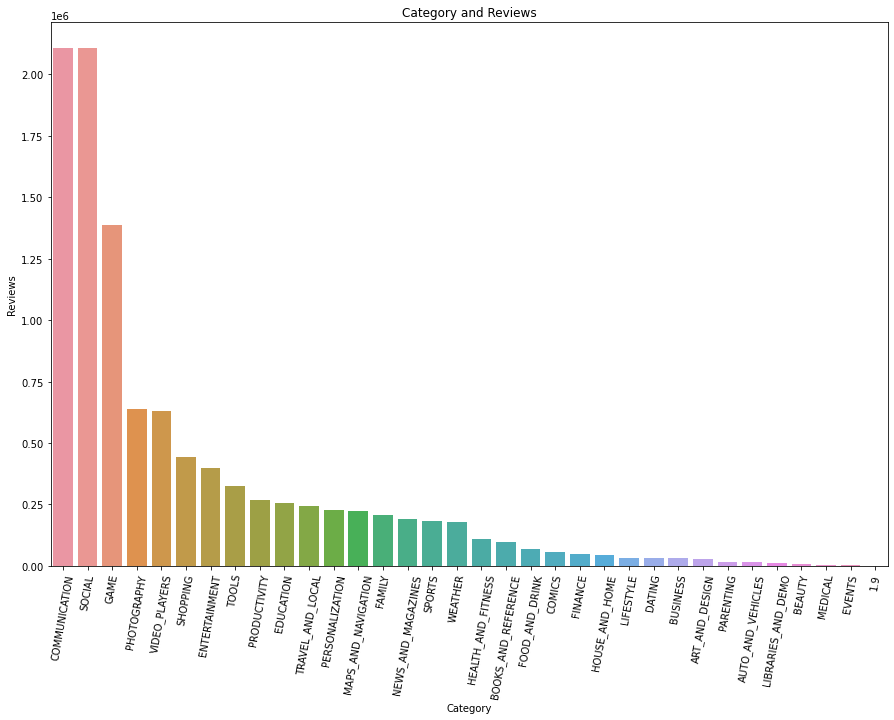

In [7]:
#The number of reviews in a category
category_list = list(df['Category'].unique())
category_review = []
for i in category_list:
    x = df[df['Category'] == i].copy()
    x['Reviews'] = pd.to_numeric(x['Reviews'],errors='coerce')
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

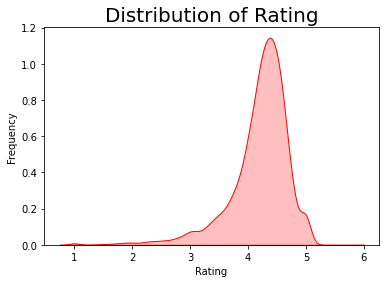

In [8]:
g = sns.kdeplot(df.Rating, color="Red", shade = True, clip=(0.0, 6.0))
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

In [9]:
review_numeric = pd.to_numeric(df['Reviews'],errors='coerce')

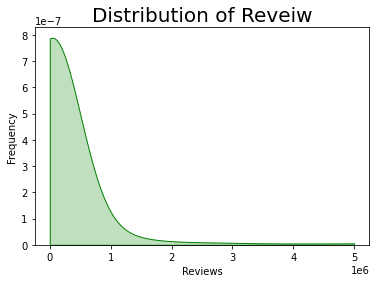

In [10]:
g = sns.kdeplot(review_numeric, color="Green", shade = True, clip=(0.0, 5000000))
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)
plt.show()

In [11]:
install_numeric = df.Installs.copy()
install_numeric = install_numeric.apply(lambda x: x.replace(',',''))
install_numeric = install_numeric.apply(lambda x: x.replace('+',''))
install_numeric = install_numeric.apply(lambda x: x.replace('Free','0'))
install_numeric = install_numeric.apply(lambda x: x.replace('','0'))
install_numeric = install_numeric.apply(lambda x: int(x))

In [12]:
Sorted_value = sorted(list(install_numeric.unique()))
install_numeric.replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

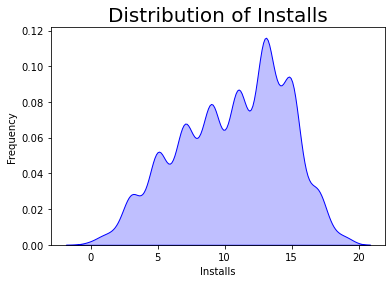

In [13]:
g = sns.kdeplot(install_numeric, color="Blue", shade = True)
g.set_xlabel("Installs")
g.set_ylabel("Frequency")
plt.title('Distribution of Installs',size = 20)
plt.show()

## Missing Values


### Null values

In [14]:
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [15]:
df.dropna(axis=0, inplace=True)

### Install has non numeric values ( "Free", "+" )



In [16]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [17]:
df['Reviews'].describe()

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

# Wrong Values

### Rating has wrong value (>5)

In [18]:
df[ df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
c = df[ df['Rating'] > 5].index
df.drop(c,inplace=True)

# Unusable

Remove unnecessary columns

In [20]:
df.drop(['Android Ver', 'Size','Genres'],axis=1, inplace=True)

# Outliers

Drops the index of a value less than or greater than the minimum value.

Using IQR of the Review.

In [21]:
df['Reviews'] = df['Reviews'].apply(pd.to_numeric,errors='coerce')

In [22]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs           object
Type               object
Price              object
Content Rating     object
Last Updated       object
Current Ver        object
dtype: object

In [23]:
q1=df['Reviews'].quantile(q=0.25, interpolation='nearest')
q3=df['Reviews'].quantile(q=0.75, interpolation='nearest')
q1=int(q1)
q3=int(q3)
iqr=q3-q1
iqr

81427

In [24]:
condition1=df['Reviews']<q1-1.5*iqr
condition2=df['Reviews']>q3+1.5*iqr
a=df[condition1].index
b=df[condition2].index
df.drop(a,inplace=True)
df.drop(b,inplace=True)

In [25]:
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,"June 20, 2018",1.1
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,"50,000+",Free,0,Everyone,"March 26, 2017",1.0
...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,"1,000+",Free,0,Everyone,"March 23, 2014",0.8
10834,FR Calculator,FAMILY,4.0,7,500+,Free,0,Everyone,"June 18, 2017",1.0.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,"July 25, 2017",1.48
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,"July 6, 2018",1.0


In [26]:
#outlier처리된 Reviews의 q1,q3값. labeling할 예정
q1=df['Reviews'].quantile(q=0.25, interpolation='nearest')
q3=df['Reviews'].quantile(q=0.75, interpolation='nearest')
q1=int(q1)
q3=int(q3)
print("q1:", q1, "q3:", q3)

q1: 100 q3: 23060


In [27]:
#75% or more value judged as interested (1)
df["Review_labeling"] =df["Reviews"].apply(lambda x: 1 if x >= 23060 else 0)
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Review_labeling
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,"50,000+",Free,0,Everyone,"March 26, 2017",1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,"1,000+",Free,0,Everyone,"March 23, 2014",0.8,0
10834,FR Calculator,FAMILY,4.0,7,500+,Free,0,Everyone,"June 18, 2017",1.0.0,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,"July 25, 2017",1.48,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,"July 6, 2018",1.0,0


# **Encoder**
Encoding for data missing algorithms
Map data to an array for processing by data mining algorithms.

*   Convert non-numeric data to numeric data.
 *   Categorical data -> numeric data
 *   text -> numeric data
*   Convert data to be in [0, 1] for processing by neural networks.




In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7726 non-null   object 
 1   Category         7726 non-null   object 
 2   Rating           7726 non-null   float64
 3   Reviews          7726 non-null   int64  
 4   Installs         7726 non-null   object 
 5   Type             7726 non-null   object 
 6   Price            7726 non-null   object 
 7   Content Rating   7726 non-null   object 
 8   Last Updated     7726 non-null   object 
 9   Current Ver      7726 non-null   object 
 10  Review_labeling  7726 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 724.3+ KB


---
2. Encode ***df['Installs']***


In [29]:
# Cleaning the number of installations column
#df['Installs'] = [int(i[:-1].replace(',','+','')) for i in df['Installs']]
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: x.replace('Free','0'))
df.Installs = df.Installs.apply(lambda x: x.replace('','0'))
df.Installs = df.Installs.apply(lambda x: int(x))

In [30]:
df['Installs'].unique()

array([        1000000000,       500000000000,     50000000000000,
             100000000000,         5000000000,     10000000000000,
         1000000000000000,           50000000,   5000000000000000,
                 10000000,             100000,             500000,
                     1000,                 50,               5000,
                       10, 100000000000000000], dtype=int64)

---
3. Encode ***df['Type']***


In [31]:
# Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

---
4. Encode ***df['Content Rating']***


In [32]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

---
5. Encode ***df['Price']***
*   non-numeric value : $
*   change *object* into *float*




In [33]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [34]:
# Missing value 파트에서 다루면 지우기.
# df['Price']에 'Everyone' 값이 오류가 남 => 'Everyone'이 있는 행을 지워줌.
df.drop(df.loc[df['Price'] == 'Everyone'].index, inplace = True)
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [35]:
# Price cealning
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [36]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])



---
5. Encode ***df['Last Updated']***


In [37]:
## Last Updated -> Date type
from datetime import datetime,date
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
4   2018-06-20
5   2017-03-26
Name: Last Updated, dtype: datetime64[ns]

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(df['Last Updated'])
df['Last Updated'] = label_encoder.transform(df['Last Updated'])
df['Last Updated']

0        1072
1        1080
2        1277
4        1235
5         801
         ... 
10833     133
10834     875
10836     911
10837    1251
10839     242
Name: Last Updated, Length: 7726, dtype: int64



---
5. Encode ***df['Current Ver']***


In [39]:
import re
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())
df['Current Ver'].head()

0    1.00
1    2.00
2    1.24
4    1.10
5    1.00
Name: Current Ver, dtype: float64

---
5. Encode ***df['Reviews']***
*   Don't need to Encoding ***df['Reviews']*** ; float64




In [40]:
df['Reviews']

0          159
1          967
2        87510
4          967
5          167
         ...  
10833       44
10834        7
10836       38
10837        4
10839      114
Name: Reviews, Length: 7726, dtype: int64

---
6. Encode ***df['Category']***

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(df['Category'])
df['Category'] = label_encoder.transform(df['Category'])
df['Category']

0         0
1         0
2         0
4         0
5         0
         ..
10833     3
10834    11
10836    11
10837    11
10839     3
Name: Category, Length: 7726, dtype: int32

In [42]:
#After Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7726 non-null   object 
 1   Category         7726 non-null   int32  
 2   Rating           7726 non-null   float64
 3   Reviews          7726 non-null   int64  
 4   Installs         7726 non-null   int64  
 5   Type             7726 non-null   int64  
 6   Price            7726 non-null   float64
 7   Content Rating   7726 non-null   int32  
 8   Last Updated     7726 non-null   int64  
 9   Current Ver      7726 non-null   float64
 10  Review_labeling  7726 non-null   int64  
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 664.0+ KB




---



---



# **Scaling**
Scaling for numeric data (Review, Install, Price, Rating)

Using **Standard Scaler**

*   Standard Scaler: much affected by outlier
 *   But, We had dropped outlier and original data has less outlier


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
to_scale = df[['Reviews', 'Installs', 'Price', 'Rating', 'Current Ver']]

In [45]:
scaler = StandardScaler()
scaler.fit(to_scale) # need numeric
df[['Reviews', 'Installs', 'Price', 'Rating', 'Current Ver']] = scaler.transform(to_scale)

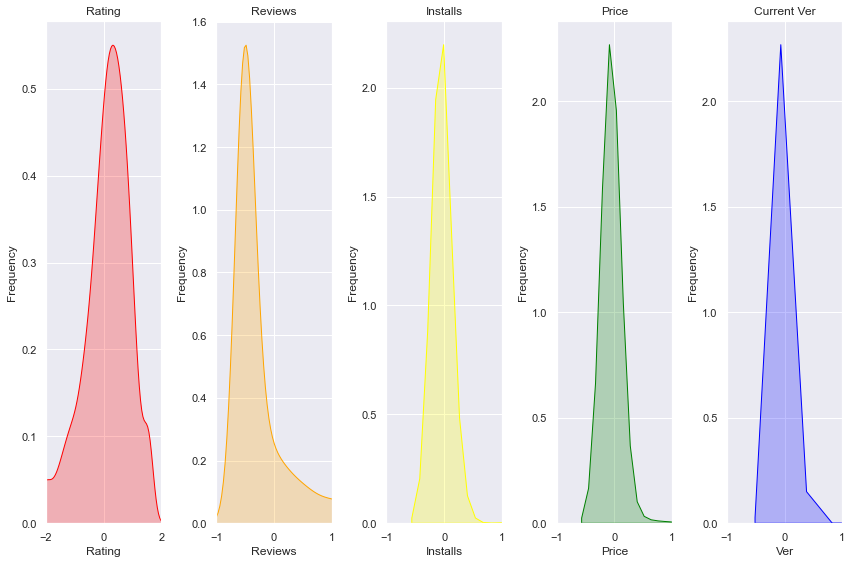

In [46]:
sns.set(rc={'figure.figsize':(12,8)})
fig, ax = plt.subplots(1, 5)

sns.kdeplot(df.Rating, color="Red", shade=True, ax=ax[0])
ax[0].set_xlim(-2,2)
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Frequency")
ax[0].set_title('Rating')

sns.kdeplot(df.Reviews, color="Orange", shade=True, ax=ax[1])
ax[1].set_xlim(-1,1)
ax[1].set_xlabel("Reviews")
ax[1].set_ylabel("Frequency")
ax[1].set_title('Reviews')

sns.kdeplot(df.Installs, color="Yellow", shade=True, ax=ax[2])
ax[2].set_xlim(-1,1)
ax[2].set_xlabel("Installs")
ax[2].set_ylabel("Frequency")
ax[2].set_title('Installs')

sns.kdeplot(df.Price, color="Green", shade=True, ax=ax[3])
ax[3].set_xlim(-1,1)
ax[3].set_xlabel("Price")
ax[3].set_ylabel("Frequency")
ax[3].set_title('Price')

sns.kdeplot(df['Current Ver'], color="Blue", shade=True, ax=ax[4])
ax[4].set_xlim(-1,1)
ax[4].set_xlabel("Ver")
ax[4].set_ylabel("Frequency")
ax[4].set_title('Current Ver')

plt.tight_layout()

# Feature Selection
Many models, especially those based on regression slopes and intercepts, will estimate parameters for every term in the model. 
Because of this, the presence of non-informative variables can add uncertainty to the predictions and reduce the overall effectiveness of the model.

Calculating the importance of characteristics using other models Use other models such as random forests to calculate the importance of characteristics, and the final classification may use other models.

:  **outcome**

[9.38339438e-02 1.20968559e-01 5.54567167e-01 1.27364074e-02
 2.79180972e-03 2.00276088e-02 1.95037372e-01 3.71331883e-05]


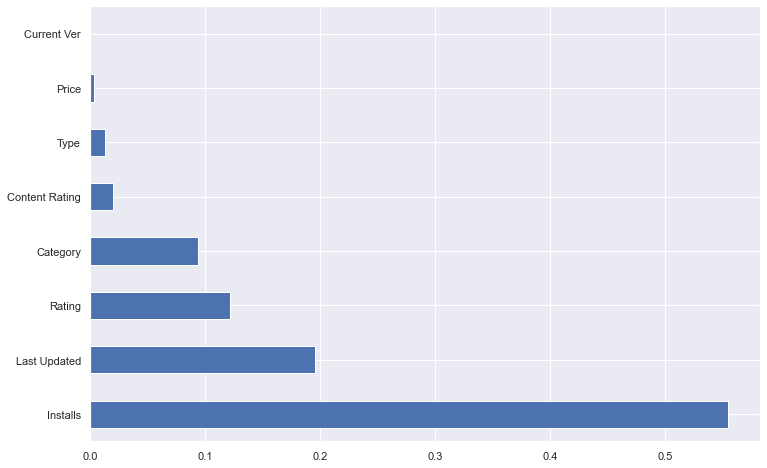

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X= df.drop(columns=['Review_labeling','App', 'Reviews'])
y=df['Review_labeling']
model =ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use buit-in class features-importances of tree-based classifiers

#plot graph of feature importances for better visualization

feat_importances= pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

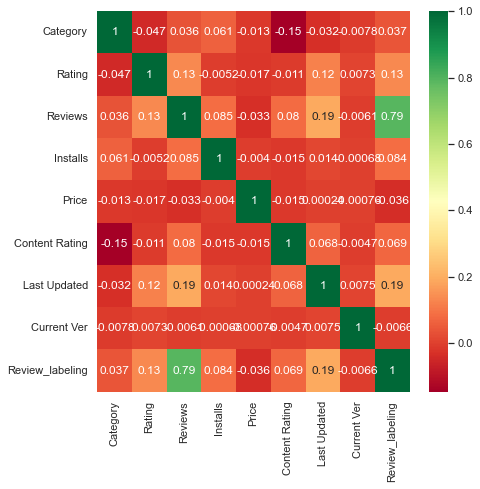

In [48]:
#Correaltion matirx
cor_df = df.drop(['Type'], axis=1)
corrmat = cor_df.corr() #corr() computes pairwise correlations of features in a Data Frame
plt.figure(figsize=(7,7))

#plot the heat map
g=sns.heatmap(corrmat,annot=True, cmap="RdYlGn")

In [49]:
df_corr_rating = df.corr()[["Reviews"]].sort_values(by='Reviews',ascending=False)
df_corr_rating

,Reviews
Reviews,1.000000
Review_labeling,0.793199
Last Updated,0.191664
Rating,0.132734
Installs,0.084522
Content Rating,0.079895
Category,0.036012
Current Ver,-0.006109
Price,-0.032667
Type,-0.116965


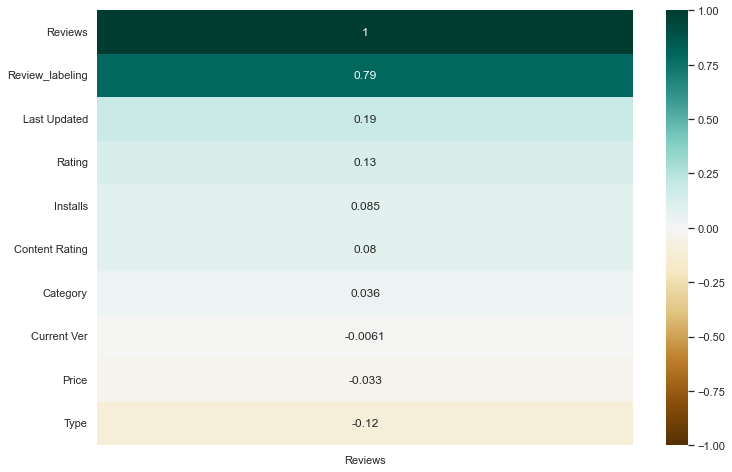

In [50]:
sns.heatmap(df_corr_rating, annot=True, cmap="BrBG", vmin=-1, vmax=1);

Two columns most relevant to the review
: **Installs**, **Rating** , **Last Updated**

# Anlaysis Algorithms & Evaluation

## Logistic regression & KFold methods.

-> Using Logistic regression model for 'Review_labeling' and evaluate performance.

-> We determine how well the model is predicting based on the presence or absence of the previously predicted 'high-interest app'

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [52]:
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Review_labeling
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,-0.088478,-0.533258,-0.060054,0,-0.066742,0,1072,-0.011378,0
1,Coloring book moana,0,-0.452183,-0.513190,-0.059922,0,-0.066742,0,1080,-0.011378,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,1.002635,1.636305,-0.046836,0,-0.066742,0,1277,-0.011378,1
4,Pixel Draw - Number Art Coloring Book,0,0.275226,-0.513190,-0.060027,0,-0.066742,0,1235,-0.011378,0
5,Paper flowers instructions,0,0.457078,-0.533060,-0.060053,0,-0.066742,0,801,-0.011378,0
...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),3,1.184487,-0.536115,-0.060054,0,-0.066742,0,133,-0.011378,0
10834,FR Calculator,11,-0.270330,-0.537034,-0.060054,0,-0.066742,0,875,-0.011378,0
10836,Sya9a Maroc - FR,11,0.638931,-0.536264,-0.060054,0,-0.066742,0,911,-0.011378,0
10837,Fr. Mike Schmitz Audio Teachings,11,1.548192,-0.537108,-0.060054,0,-0.066742,0,1251,-0.011378,0


In [53]:
X= df.drop(columns=['Review_labeling','App', 'Reviews'])
y=df['Review_labeling']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, 
                                               random_state=1, 
                                              stratify=y)

In [54]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
print(model.score(X_test, y_test))

0.7716688227684346


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

logistic_cv = LogisticRegression(solver='lbfgs', max_iter=1000)

# train model with cv of 5

cv_scores = cross_val_score(logistic_cv, X, y, cv=5)

print('cross-val-score \n{}'.format(cv_scores))

# print each cv score (accuracy) and average them  print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cross-val-score 
[0.74838292 0.81941748 0.76634304 0.76763754 0.7579288 ]
cv_scores mean:0.7719419569030843


## RandomForest & Hyperparmeter tuning with GridSearchCV

-> The predicted values from the predicted output that produced by multiple models through voting.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score

In [58]:
for x in range(2,5):
        forest=RandomForestClassifier(max_depth=x,n_estimators=30)
        forest.fit(X_train,y_train)
        y_pred=forest.predict(X_test)
        print('depth= ',x,' estimators= ',30,'accuracy= ',accuracy_score(y_test,y_pred))

depth=  2  estimators=  30 accuracy=  0.8357050452781372
depth=  3  estimators=  30 accuracy=  0.8829236739974127
depth=  4  estimators=  30 accuracy=  0.8861578266494179


In [59]:
forest1=RandomForestClassifier(max_depth=19)
forest1.fit(X_train,y_train)
y_pred=forest1.predict(X_test)
final_df=pd.DataFrame({'Pred':y_pred,'Actual':y_test})

In [60]:
final_df

,Pred,Actual
6195,1,1
10386,1,1
4597,0,0
2990,1,1
10428,0,0
...,...,...
4913,0,0
10802,0,0
7868,0,0
9317,0,0


In [61]:
from sklearn.model_selection import GridSearchCV  # define grid parameters
grid_param = { 'n_estimators': [10, 30, 50, 80, 100],  'criterion': ['gini', 'entropy'], 'bootstrap': [True, False] }

In [62]:
gd_sr = GridSearchCV(estimator=forest,  param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=30),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 30, 50, 80, 100]},
             scoring='accuracy')

In [63]:
gd_sr.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', gd_sr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(gd_sr.best_score_))

최적 하이퍼 파라미터:  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
최고 예측 정확도: 0.9031
